<br>
<h1 style = "font-size:30px; font-family:cursive ; font-weight : bold; color : #0331A8; text-align: center; border-radius: 10px 100px;">Understanding Regularization in Machine Learning</h1>
<br>

![](https://miro.medium.com/max/1050/1*rrjJaesIzo46XTT3y-SYXA.gif)

### It is highly recommended to read the documentation before implementing any alogorithm.

- **Linear Regression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- **Lasso Regression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html <br>
- **Lasso CV** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV <br>
- **Ridge Regression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html <br>
- **Ridge CV** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV

- **R2_SCORE** : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html <br>
- **MSE** : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html <br>
- **MAE** : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

<span style="font-size:20px;color:#AA0078;font-weight : bold">1) Import Numpy, Pandas, Matplotlib, Seaborn and Linear Regression</span>

In [3]:
## ======== YOUR CODE HERE ======== ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression

## ================================ ##

## Import Lasso,Rigde along with thier CV versions. This step is done for you.
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV

## Import evaluation metrics and scalers.
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

<span style="font-size:20px;color:#AA0078;font-weight : bold">2) Read the provided dataset.</span>

In [6]:
## ======== YOUR CODE HERE ======== ##

df = pd.read_csv(r"C:\Users\dhchaudhary\Downloads\Data.csv")

<span style="font-size:20px;color:#AA0078;font-weight : bold">3) Check the shape of the dataset</span>

In [7]:
## ======== YOUR CODE HERE ======== ##
  ## It should come as (1460,81) ##
df.shape

(1460, 81)

<span style="font-size:20px;color:#AA0078;font-weight : bold">4) Assign all the numerical features of the Dataset as df_num and apply describe method on it.</span>

In [8]:
## Categorical features comes under "object" data-types. SO try exculding them.(This has been done for you.)
## Use decribe on the assigned variable. 
df_num = df.select_dtypes(exclude="object")
df_num.describe().T.style.background_gradient(subset=['std'], cmap='Oranges')\
                            .background_gradient(subset=['50%'], cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


<span style="font-size:20px;color:#AA0078;font-weight : bold">5) Check the correlation for whole dataset</span>

In [9]:
## ======== YOUR CODE HERE ======== ##
df.corr().style.background_gradient(cmap='GnBu')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

<span style="font-size:20px;color:#AA0078;font-weight : bold">6) Feature Encoding for categorical columns:</span>

In [12]:
## Include "object" data-types for categorical columns.
df_cat = df.select_dtypes(include="object").columns.values

## Use One Hot encoding on the df and use columns as df_cat

## ======== YOUR CODE HERE ======== ##
df_encoded = pd.get_dummies(df)

In [13]:
print("Shape before Encoding:",df.shape)
print("\nShape after Encoding:",df_encoded.shape)

Shape before Encoding: (1460, 81)

Shape after Encoding: (1460, 290)


In [14]:
df_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


<span style="font-size:20px;color:#AA0078;font-weight : bold">7) Check NAN value in the dataset and fill it with '0' with inplace=True</span>

In [19]:
df2 = df_encoded.copy()

## ======== YOUR CODE HERE ======== ##

df2.fillna(0, inplace = True)

In [20]:
df2.isnull().sum().max()

0

<span style="font-size:20px;color:#AA0078;font-weight : bold">8) Drop 'Id' and 'SalePrice' column from cleaned encoded data (df2) and assign it to variable X</span>

In [25]:
## ======== YOUR CODE HERE ======== ##

X = df2.drop(['Id', 'SalePrice'], axis =1)

## ================================ ##

Y = df2['SalePrice']

<span style="font-size:20px;color:#AA0078;font-weight : bold">9) Use train-test split on X and Y using random_state = 2021 and test_size = 0.25</span>

In [26]:
## ======== YOUR CODE HERE ======== ##

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2021, test_size=0.25)

## ================================ ##

In [27]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

## ================================ ##

print('\nExpected shapes:\n')
print("X_train:(1095, 288)")
print("X_test: (365, 288)")
print("y_train:(1095,)")
print("y_test:(365,)")
print('\nVerify if they are matching')

X_train: (1095, 288)
X_test: (365, 288)
y_train: (1095,)
y_test: (365,)

Expected shapes:

X_train:(1095, 288)
X_test: (365, 288)
y_train:(1095,)
y_test:(365,)

Verify if they are matching


<span style="font-size:20px;color:#AA0078;font-weight : bold">10) Train the Linear Regression Model with all default parameters.</span>

In [29]:
## ======== YOUR CODE HERE ======== ##

lr = LinearRegression()

lr.fit(X_train, y_train)

## ================================ ##

LinearRegression()

In [31]:
## Check the intercept of Linear regression model

## ======== YOUR CODE HERE ======== ##

print("Intercept for Linear Model:",lr.intercept_)

## ================================ ##

Intercept for Linear Model: 616028.4616214328


In [30]:
## ================================ ##
    ## Run this cell as it is ## 
## ================================ ##
print("Linear Regression Training R2 score is",r2_score(y_train,lr.predict(X_train)))
print("Linear Regression Testing R2 score is",r2_score(y_test,lr.predict(X_test)))
print("-"*50)
print("Linear Regression Training mean_square_error is",mean_squared_error(y_train,lr.predict(X_train)))
print("Linear Regression Testing mean_square_error is",mean_squared_error(y_test,lr.predict(X_test)))
print("-"*50)
print("Linear Regression Training mean_absolute_error is",mean_absolute_error(y_train,lr.predict(X_train)))
print("Linear Regression Testing mean_absolute_error is",mean_absolute_error(y_test,lr.predict(X_test)))

Linear Regression Training R2 score is 0.9372168985650277
Linear Regression Testing R2 score is 0.17052132999726555
--------------------------------------------------
Linear Regression Training mean_square_error is 400415637.5945854
Linear Regression Testing mean_square_error is 5043619337.844067
--------------------------------------------------
Linear Regression Training mean_absolute_error is 12686.710403045856
Linear Regression Testing mean_absolute_error is 22092.930652837895


<div class="alert alert-block alert-info"> 📌 Did you notice the huge difference b/w training and testing R2 score .</div>

<span style="font-size:20px;color:#AA0078;font-weight : bold">11) Train the Linear model with L1 regularization aka Lasso</span>

In [32]:
## ======== YOUR CODE HERE ======== ##

lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

## ================================ ##

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232543135069.82477, tolerance: 698364867.5276122
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [33]:
## Check the intercept of Lasso model

## ======== YOUR CODE HERE ======== ##

print("Intercept for Lasso Model:",lasso_model.intercept_)

## ================================ ##


Intercept for Lasso Model: 551578.6331543552


In [34]:
## Find the training and testing error for Lasso Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Lasso Model Training R2 score is",r2_score(y_train,lasso_model.predict(X_train)))
print("Lasso Model Testing R2 score is",r2_score(y_test,lasso_model.predict(X_test)))
print("-"*50)

## Mean Square Error (MSE)
print("Lasso Model Training mean_square_error is",mean_squared_error(y_train,lasso_model.predict(X_train)))
print("Lasso Model Testing mean_square_error is",mean_squared_error(y_test,lasso_model.predict(X_test)))
print("-"*50)

## Mean Absolute Error (MAE)
print("Lasso Model Training mean_absolute_error is",mean_absolute_error(y_train,lasso_model.predict(X_train)))
print("Lasso Model Testing mean_absolute_error is",mean_absolute_error(y_test,lasso_model.predict(X_test)))

## ================================ ##

Lasso Model Training R2 score is 0.9346414357986955
Lasso Model Testing R2 score is 0.8965840839866219
--------------------------------------------------
Lasso Model Training mean_square_error is 416841324.4770682
Lasso Model Testing mean_square_error is 628817271.2677612
--------------------------------------------------
Lasso Model Training mean_absolute_error is 13123.084998402242
Lasso Model Testing mean_absolute_error is 17124.8126791845


<div class="alert alert-block alert-info"> 📌 Did you noticed how we overcame Overfitting problem by Lasso Model (L1 regularization) .</div>

<span style="font-size:20px;color:#AA0078;font-weight : bold">12) Train the Linear model with L2 regularization aka Ridge </span>

In [35]:
## ======== YOUR CODE HERE ======== ##

ridge = Ridge()

ridge.fit(X_train, y_train)
## ================================ ##

Ridge()

In [36]:
## Check the intercept of Ridge model

## ======== YOUR CODE HERE ======== ##

print("Intercept for Ridge Model:",ridge.intercept_)

## ================================ ##

Intercept for Ridge Model: 960573.005782754


In [37]:
## Find the training and testing error for Ridge Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Ridge Model Training R2 score is",r2_score(y_train,ridge.predict(X_train)))
print("Ridge Model Testing R2 score is",r2_score(y_test,ridge.predict(X_test)))
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model Training mean_square_error is",mean_squared_error(y_train,ridge.predict(X_train)))
print("Ridge Model Testing mean_square_error is",mean_squared_error(y_test,ridge.predict(X_test)))
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model Training mean_absolute_error is",mean_absolute_error(y_train,ridge.predict(X_train)))
print("Ridge Model Testing mean_absolute_error is",mean_absolute_error(y_test,ridge.predict(X_test)))

## ================================ ##

Ridge Model Training R2 score is 0.9217358204324827
Ridge Model Testing R2 score is 0.8893859749836945
--------------------------------------------------
Ridge Model Training mean_square_error is 499150259.32261604
Ridge Model Testing mean_square_error is 672585149.9076717
--------------------------------------------------
Ridge Model Training mean_absolute_error is 14490.494070072105
Ridge Model Testing mean_absolute_error is 17592.851294903696


<span style="font-size:20px;color:#AA0078;font-weight : bold">13) Feature Transformation </span>

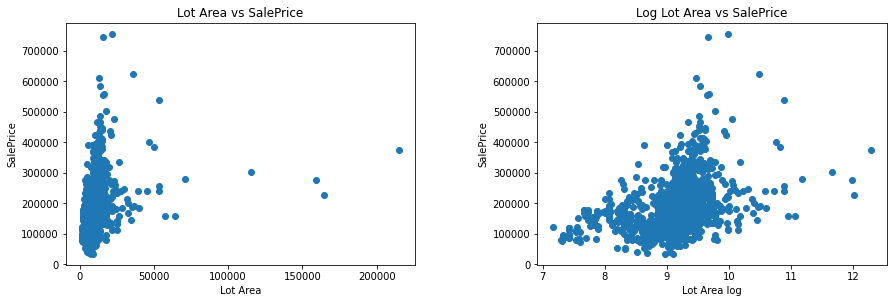

In [38]:
plt.subplot(122)
plt.xlabel("Lot Area log")
plt.ylabel("SalePrice")
plt.title("Log Lot Area vs SalePrice")

## Plot a scatter plot with x as LOG-TRANSFORMED lot Area and y as Sale Price from original dataframe df.
## ======== YOUR CODE HERE ======== ##

plt.scatter(np.log(df["LotArea"]),df["SalePrice"])

## ================================ ##



plt.subplot(121)
plt.xlabel("Lot Area")
plt.ylabel("SalePrice")
plt.title("Lot Area vs SalePrice")

## Plot a scatter plot with x as lot Area and y as Sale Price from original dataframe df.

## ======== YOUR CODE HERE ======== ##

plt.scatter(df["LotArea"],df["SalePrice"])

## ================================ ##

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

In [ ]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Sale price")
plt.hist(df["SalePrice"])

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log sale price")

## Plot a histogram for LOG-TRANSFORMED SALE PRICE COLUMN. Use np.log1p instead of np.log

## ======== YOUR CODE HERE ======== ##


## ================================ ##

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

In [ ]:
## ================================ ##
    ## Run this cell as it is ## 
## ================================ ##

plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Sale price")
plt.scatter(df["TotalBsmtSF"],np.log1p(df["SalePrice"]))

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log sale price")
plt.scatter(np.log1p(df["TotalBsmtSF"]),np.log1p(df["SalePrice"]))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

In [ ]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Sale price")
plt.hist(df["LotArea"])

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log sale price")

## Plot a histogram for LOG-TRANSFORMED LOT AREA. Use np.log1p instead of np.log

## ======== YOUR CODE HERE ======== ##


## ================================ ##

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

In [ ]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Basement Square feet")
plt.hist(df["TotalBsmtSF"])

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log Basemetn Square Feet")

## Plot a histogram for LOG-TRANSFORMED TOTAL BASEMENT SQ. FEET. Use np.log1p instead of np.log

## ======== YOUR CODE HERE ======== ##


## ================================ ##

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

<span style="font-size:20px;color:#AA0078;font-weight : bold">14) Transform the 'SalePrice' logarithmically and apply train-test split like before.</span>

In [ ]:
## Use np.log1p instead of np.log

## ======== YOUR CODE HERE ======== ##

y1 = _________

## ================================ ##


In [ ]:
## Use random state as 2021 and test size as 0.25

## ======== YOUR CODE HERE ======== ##

X_train_trans, X_test_trans, y_train_trans, y_test_trans = 

## ================================ ##


In [ ]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train_trans:", ________________) # X_train_trans
print("X_test_trans:",__________________) # X_test_trans
print("y_train_trans:",_________________) # y_train_trans
print("y_test_trans:",__________________) # y_test_trans

## ================================ ##

print('\nExpected shapes:\n')
print("X_train:(1095, 288)")
print("X_test: (365, 288)")
print("y_train:(1095,)")
print("y_test:(365,)")
print('\nVerify if they are matching')

<span style="font-size:20px;color:#AA0078;font-weight : bold">15) Train Linear Regression on transformed data with all default parameters.</span>

In [ ]:
## ======== YOUR CODE HERE ======== ##

lr_trans = ______________

lr_trans.fit(________________)

## ================================ ##

In [ ]:
## Check the intercept of New Linear Model

## ======== YOUR CODE HERE ======== ##

print("Intercept for New Linear Model:",____________)

## ================================ ##

In [ ]:
## Find the training and testing error for Linear transformed Model

## ======== YOUR CODE HERE ======== ##

## Since we have used log transformation, so we have to transformed it back using np.exp while calculating error.

## R2 score
print("Linear Regression Training R2 score with log transformation is",___________________________________)
print("Linear Regression Testing R2 score with log transformation is",____________________________________)
print("-"*50)

## Mean Square Error (MSE)
print("Linear Regression Training mean_square_error with log transformation is",__________________________)
print("Linear Regression Testing mean_square_error with log transformation is",___________________________)
print("-"*50)

## Mean Absolute Error (MAE)
print("Linear Regression Training mean_absolute_error with log transformation is",________________________)
print("Linear Regression Testing mean_absolute_error with log transformation is",_________________________)

## ================================ ##

<div class="alert alert-block alert-info"> 📌 By doing Logarithmic transformation on the target label, we had improved our Linear Regression Model. .</div>

<span style="font-size:20px;color:#AA0078;font-weight : bold">16) Train Lasso model on the transformed data.</span>

In [ ]:
## ======== YOUR CODE HERE ======== ##

lasso_model_trans = ______________

lasso_model_trans.fit(________________)

## ================================ ##

In [ ]:
## Find the training and testing error for Lasso Transformed Model

## ======== YOUR CODE HERE ======== ##

## Since we have used log transformation, so we have to transformed it back using np.exp while calculating error.

## R2 score
print("Lasso Model Training R2 score with log transformation is",___________________________________)
print("Lasso Model Testing R2 score with log transformation is",____________________________________)
print("-"*50)

## Mean Square Error (MSE)
print("Lasso Model Training mean_square_error with log transformation is",__________________________)
print("Lasso Model Testing mean_square_error with log transformation is",___________________________)
print("-"*50)

## Mean Absolute Error (MAE)
print("Lasso Model Training mean_absolute_error with log transformation is",________________________)
print("Lasso Model Testing mean_absolute_error with log transformation is",_________________________)

## ================================ ##

<span style="font-size:20px;color:#AA0078;font-weight : bold">17) Train Ridge Model on the transformed data.</span>

In [ ]:
## ======== YOUR CODE HERE ======== ##

ridge_trans = ______________

ridge_trans.fit(________________)

## ================================ ##

In [ ]:
## Find the training and testing error for Ridge Transformed Model

## ======== YOUR CODE HERE ======== ##

## Since we have used log transformation, so we have to transformed it back using np.exp while calculating error.

## R2 score
print("Ridge Model Training R2 score with log transformation is",___________________________________)
print("Ridge Model Testing R2 score with log transformation is",____________________________________)
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model Training mean_square_error with log transformation is",__________________________)
print("Ridge Model Testing mean_square_error with log transformation is",___________________________)
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model Training mean_absolute_error with log transformation is",________________________)
print("Ridge Model Testing mean_absolute_error with log transformation is",_________________________)

## ================================ ##

<span style="font-size:20px;color:#AA0078;font-weight : bold">18) Scaling the data with Standard Scaler.</span>

In [ ]:
## Use Standard Scaler to scale the train and test data

## ======== YOUR CODE HERE ======== ##

scaler = _______________

X_train_scaled = scaler.fit_transform(________)

X_test_scaled = scaler._______________

## ================================ ##

<span style="font-size:20px;color:#AA0078;font-weight : bold">19) Train Lasso Model on the scaled data.</span>

In [ ]:
## ======== YOUR CODE HERE ======== ##

lasso_model_scaled = ______________

lasso_model_scaled.fit(________________)

## ================================ ##

In [ ]:
## Find the training and testing error for Lasso scaled Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Lasso Model Training R2 score on scaled data is",___________________________________)
print("Lasso Model Testing R2 score on scaled data is",____________________________________)
print("-"*50)

## Mean Square Error (MSE)
print("Lasso Model Training mean_square_error on scaled data is",__________________________)
print("Lasso Model Testing mean_square_error on scaled data is",___________________________)
print("-"*50)

## Mean Absolute Error (MAE)
print("Lasso Model Training mean_absolute_error on scaled data is",________________________)
print("Lasso Model Testing mean_absolute_error on scaled data is",_________________________)

## ================================ ##

<span style="font-size:20px;color:#AA0078;font-weight : bold">20) Train Ridge Model on the scaled data.</span>

In [ ]:
## ======== YOUR CODE HERE ======== ##

ridge_scaled = ______________

ridge_scaled.fit(________________)

## ================================ ##

In [ ]:
## Find the training and testing error for Ridge scaled Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Ridge Model Training R2 score on scaled data is",___________________________________)
print("Ridge Model Testing R2 score on scaled data is",____________________________________)
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model Training mean_square_error on scaled data is",__________________________)
print("Ridge Model Testing mean_square_error on scaled data is",___________________________)
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model Training mean_absolute_error on scaled data is",________________________)
print("Ridge Model Testing mean_absolute_error on scaled data is",_________________________)

## ================================ ##

<span style="font-size:20px;color:#AA0078;font-weight : bold">21) Train Ridge with cross validation on the scaled data.</span>

In [ ]:
## ======== YOUR CODE HERE ======== ##

ridge_cv = ______________

ridge_cv.fit(________________)

## ================================ ##

In [ ]:
## Find the training and testing error for Ridge CV scaled Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Ridge Model CV Training R2 score on scaled data is",___________________________________)
print("Ridge Model CV Testing R2 score on scaled data is",____________________________________)
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model CV Training mean_square_error on scaled data is",__________________________)
print("Ridge Model CV Testing mean_square_error on scaled data is",___________________________)
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model CV Training mean_absolute_error on scaled data is",________________________)
print("Ridge Model CV Testing mean_absolute_error on scaled data is",_________________________)

## ================================ ##

<br>
<h1 style = "font-size:30px; font-family:Brush Script MT ; font-weight : bold; color : #0331A8; text-align: center; border-radius: 10px 100px;">The End</h1>
<br>